In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC


In [2]:
# 1) Veri setini yükle
df = pd.read_csv("data/winequality-red.csv", sep=",")

In [3]:
# 2) Veri yapısını incele
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())


Shape: (1599, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [4]:
print("\nİlk 5 satır:")
display(df.head())


İlk 5 satır:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
import pandas as pd

df = pd.read_csv("data/winequality-red.csv")
print(df.head(10))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

In [6]:
# 3) Eksik değer kontrolü
print("\nEksik değer sayıları:")
print(df.isnull().sum())


Eksik değer sayıları:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


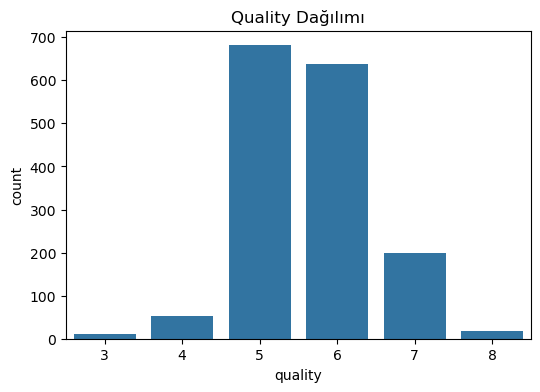

In [7]:

# 4) Quality dağılımı
plt.figure(figsize=(6,4))
sns.countplot(x=df["quality"])
plt.title("Quality Dağılımı")
plt.show()

In [8]:
# 5) Quality'i ikili sınıfa dönüştür (>=7 iyi kalite)
df["quality_label"] = (df["quality"] >= 7).astype(int)


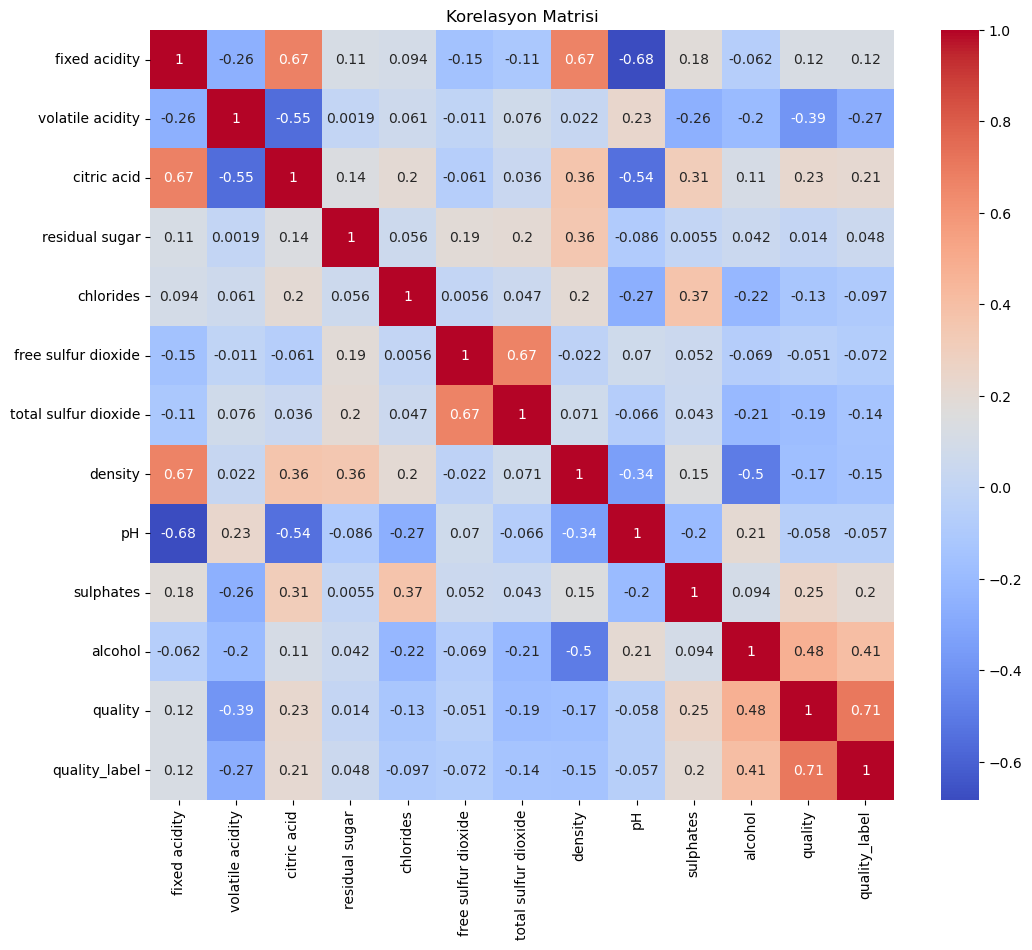

In [9]:
# 7) Korelasyon matrisi
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1) X ve y oluştur
X = df.drop(columns=["quality", "quality_label"])
y = df["quality_label"]

In [11]:
# 2) Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [12]:
# 3) Scaling (KNN ve YSA için çok önemli)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# 4) Modelleri yükle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier()
}


In [14]:
# 5) Eğitim ve ilk sonuçlar
from sklearn.metrics import accuracy_score

print("=== İlk Model Sonuçları ===")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")

=== İlk Model Sonuçları ===
Logistic Regression Accuracy: 0.8938
Decision Tree Accuracy: 0.9031
Random Forest Accuracy: 0.9375
Gradient Boosting Accuracy: 0.9156
KNN Accuracy: 0.8938


In [15]:
from sklearn.model_selection import cross_val_score
import pandas as pd

cv_results = {}

print("=== 5-Fold Cross Validation Sonuçları ===")

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)  # k=5 çapraz doğrulama
    cv_results[name] = scores.mean()
    print(f"{name}: {scores.mean():.4f}")

cv_df = pd.DataFrame({
    "Model": list(cv_results.keys()),
    "CV Accuracy (Mean)": list(cv_results.values())
})

print("\nCross Validation Tablosu:")
display(cv_df)

=== 5-Fold Cross Validation Sonuçları ===
Logistic Regression: 0.8699
Decision Tree: 0.8074
Random Forest: 0.8649
Gradient Boosting: 0.8674
KNN: 0.8449

Cross Validation Tablosu:


,Model,CV Accuracy (Mean)
0,Logistic Regression,0.869928
1,Decision Tree,0.807375
2,Random Forest,0.864922
3,Gradient Boosting,0.867422
4,KNN,0.844924


In [16]:

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1) Modeli kur
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    max_iter=300,                 
    solver='adam',
    random_state=42
)

In [17]:
# 2) Eğit
mlp.fit(X_train, y_train)


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

In [18]:
# 3) Tahmin yap
y_pred_mlp = mlp.predict(X_test)
acc_mlp = accuracy_score(y_test, y_pred_mlp)

print(f"MLPClassifier Test Accuracy: {acc_mlp:.4f}")

MLPClassifier Test Accuracy: 0.9344


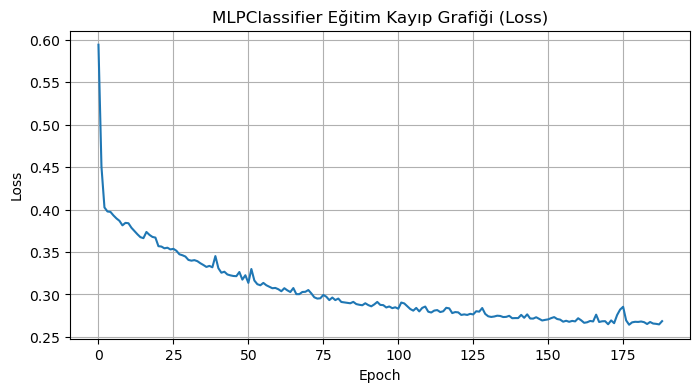

In [33]:
#HOLD OUT YSA-ACC-LOSS
# 4) LOSS (kayıp) grafiği
plt.figure(figsize=(8,4))
plt.plot(mlp.loss_curve_)
plt.title("MLPClassifier Eğitim Kayıp Grafiği (Loss)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def calculate_specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity

results = []

In [21]:
# HOLD-OUT METRIK TABLOSU


results = []

# 5 klasik model + MLP
all_models = models.copy()
all_models["MLPClassifier"] = mlp

for name, model in all_models.items():
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    specificity = calculate_specificity(y_test, y_pred)

    results.append([name, acc, precision, recall, specificity, f1])

# Sonuçları tablo olarak göster
metrics_df = pd.DataFrame(results, columns=[
    "Model", "Accuracy", "Precision", "Recall", "Specificity", "F1-Score"
])

display(metrics_df)


,Model,Accuracy,Precision,Recall,Specificity,F1-Score
0,Logistic Regression,0.893750,0.695652,0.372093,0.974729,0.484848
1,Decision Tree,0.903125,0.620000,0.720930,0.931408,0.666667
2,Random Forest,0.937500,0.896552,0.604651,0.989170,0.722222
3,Gradient Boosting,0.915625,0.785714,0.511628,0.978339,0.619718
4,KNN,0.893750,0.666667,0.418605,0.967509,0.514286
5,MLPClassifier,0.934375,0.805556,0.674419,0.974729,0.734177


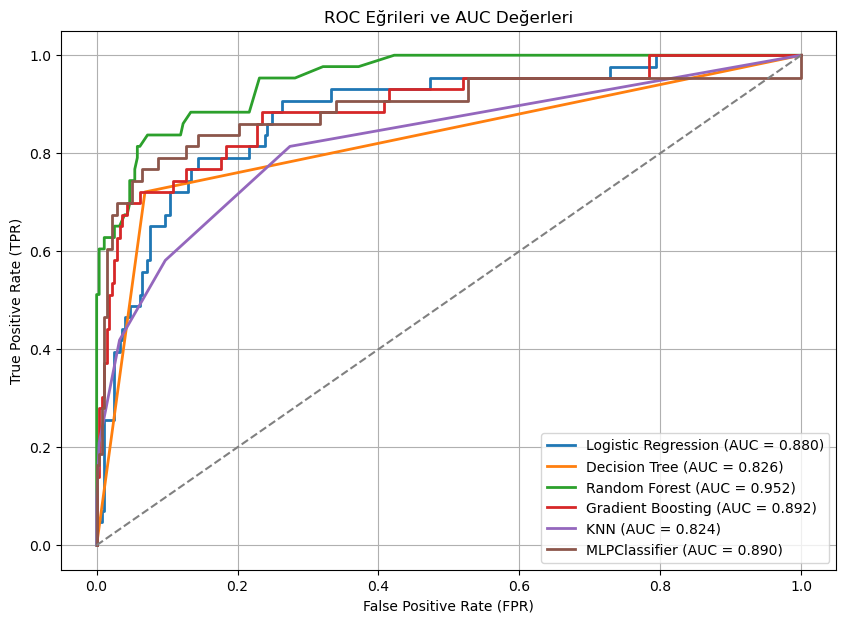

In [22]:
#HOLD OUT ROC EĞRİSİ
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 7))


for name, model in all_models.items():
    
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
       
        y_proba = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')


plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title("ROC Eğrileri ve AUC Değerleri")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [23]:
from statsmodels.stats.contingency_tables import mcnemar
import numpy as np

# En iyi iki modeli seçiyoruz (sen istersen değiştirebilirsin)
model_A = mlp                   # örnek: MLPClassifier
model_B = models["Gradient Boosting"]  # örnek: Gradient Boosting

# Tahminler
y_pred_A = model_A.predict(X_test)
y_pred_B = model_B.predict(X_test)

# McNemar tablosu oluşturma (2x2 contingency table)
# b = A yanlış → B doğru
# c = A doğru → B yanlış

b = np.sum((y_pred_A == 0) & (y_pred_B == 1) & (y_test == 1))
c = np.sum((y_pred_A == 1) & (y_pred_B == 0) & (y_test == 1))

table = [[0, b],
         [c, 0]]

print("McNemar Tablosu (b,c):", table)

# McNemar testi
result = mcnemar(table, exact=False, correction=True)
print("\nMcNemar Testi Sonuçları:")
print("Statistic:", result.statistic)
print("p-value:", result.pvalue)

if result.pvalue < 0.05:
    print("\n❗ MODELLER ARASINDA ANLAMLI FARK VAR (p < 0.05)")
else:
    print("\n✔ MODELLER ARASINDA ANLAMLI FARK YOK (p ≥ 0.05)")


McNemar Tablosu (b,c): [[0, np.int64(1)], [np.int64(8), 0]]

McNemar Testi Sonuçları:
Statistic: 4.0
p-value: 0.045500263896358445

❗ MODELLER ARASINDA ANLAMLI FARK VAR (p < 0.05)


In [24]:
import joblib

# En iyi model MLPClassifier
best_model = mlp  

# Modeli kaydet
joblib.dump(best_model, "best_model.pkl")

# Scaling modelini kaydet (arayüz için şart!)
joblib.dump(scaler, "scaler.pkl")

print("✔ Model ve scaler başarıyla kaydedildi!")


✔ Model ve scaler başarıyla kaydedildi!


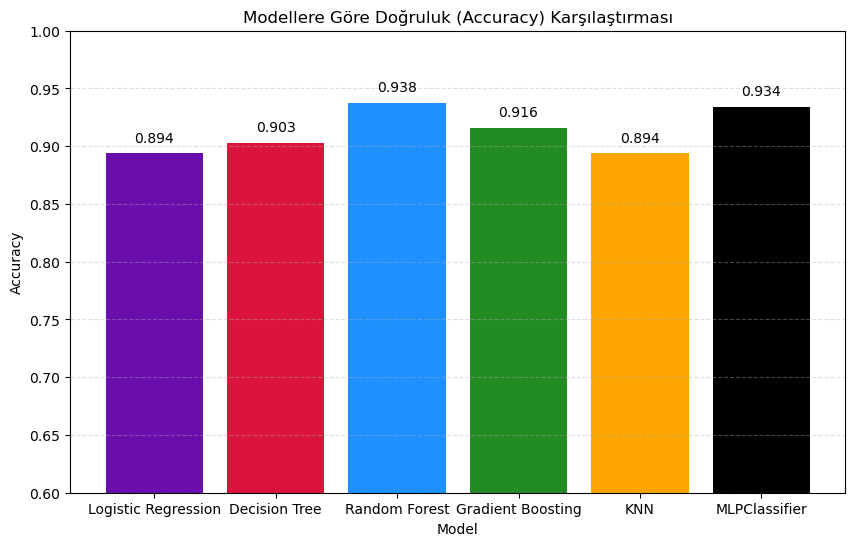

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Tüm modelleri tek bir sözlükte topluyoruz
all_models = models.copy()
all_models["MLPClassifier"] = mlp

# Sonuçları toplamak için listeler
model_names = []
accuracies = []

# Her model için doğruluk hesapla
for name, model in all_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_names.append(name)
    accuracies.append(acc)

# Grafik çizimi
plt.figure(figsize=(10,6))
plt.bar(model_names, accuracies, color=['#6a0dad', '#dc143c', '#1e90ff', '#228b22', '#ffa500', '#000000'])
plt.title("Modellere Göre Doğruluk (Accuracy) Karşılaştırması")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.6, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Çubukların üzerine değer yazma
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')

plt.show()


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


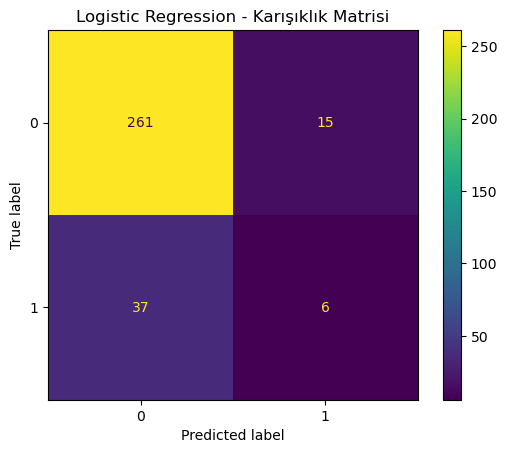

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


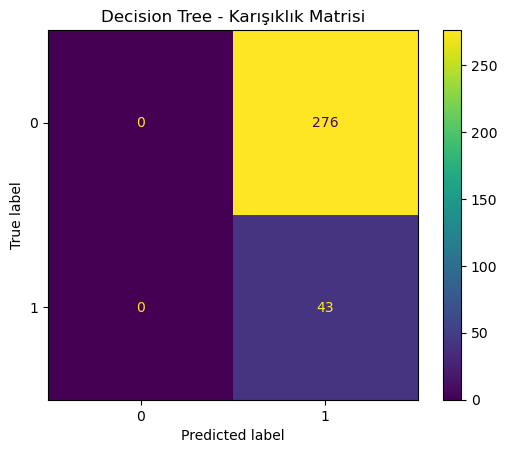

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


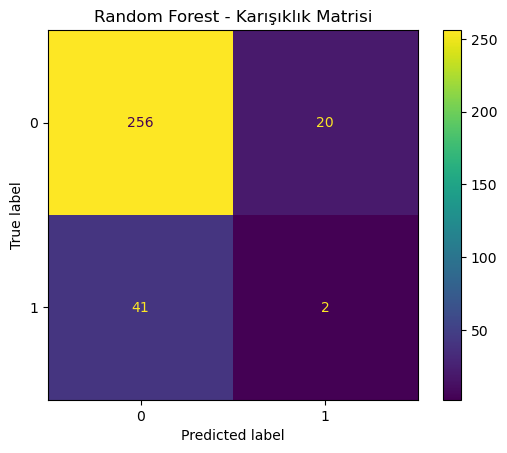

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


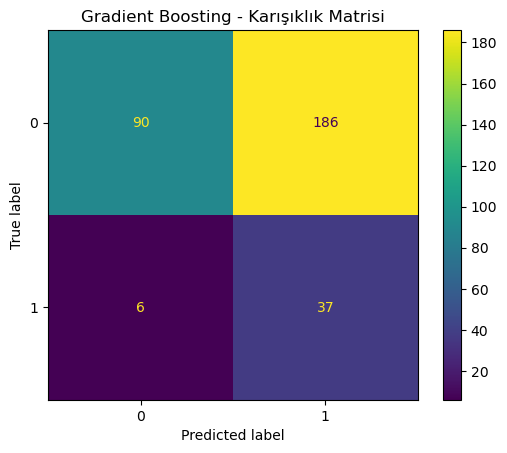

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


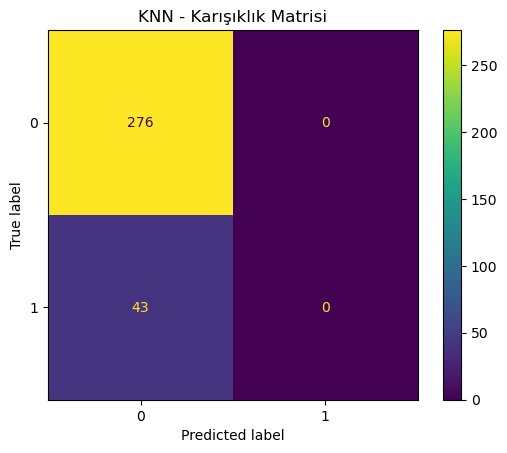

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


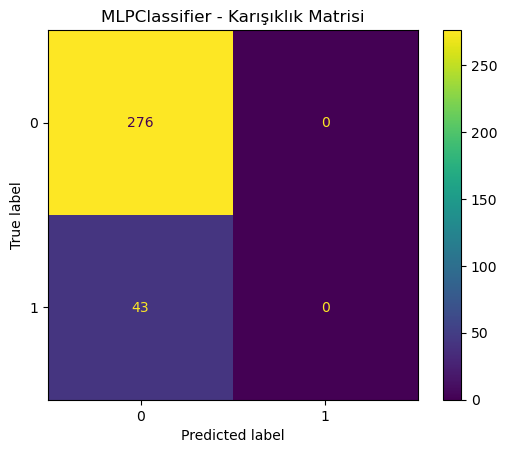

In [32]:
#HOLD OUT CM
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in all_models.items():
    y_pred = model.predict(X_test)
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f"{name} - Karışıklık Matrisi")
    plt.show()




==================== K-FOLD CONFUSION MATRICES ====================

LR - K-Fold Ortalama Confusion Matrix
---------------------------------------
          Tahmin 0  Tahmin 1
Gerçek 0       269         7
Gerçek 1        30        12


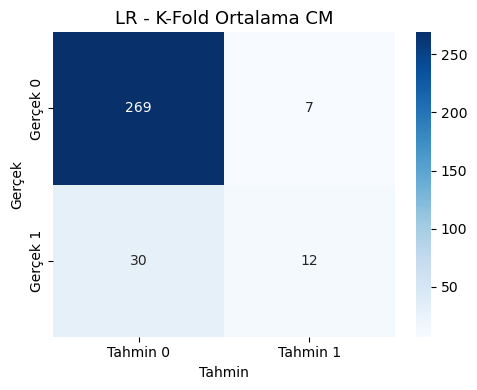


DT - K-Fold Ortalama Confusion Matrix
---------------------------------------
          Tahmin 0  Tahmin 1
Gerçek 0       254        22
Gerçek 1        19        24


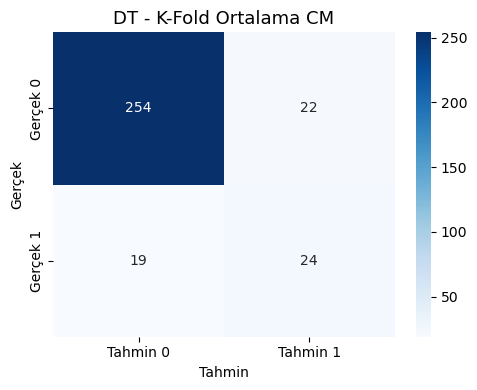


KNN - K-Fold Ortalama Confusion Matrix
---------------------------------------
          Tahmin 0  Tahmin 1
Gerçek 0       263        13
Gerçek 1        31        11


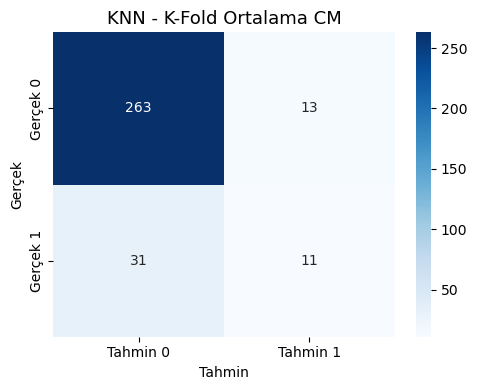


SVM - K-Fold Ortalama Confusion Matrix
---------------------------------------
          Tahmin 0  Tahmin 1
Gerçek 0       276         0
Gerçek 1        43         0


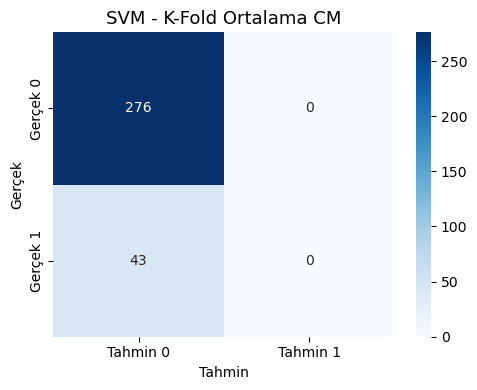


ANN - K-Fold Ortalama Confusion Matrix
---------------------------------------
          Tahmin 0  Tahmin 1
Gerçek 0       269         7
Gerçek 1        29        13


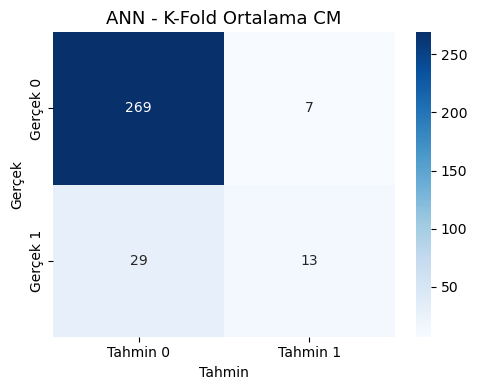


RF - K-Fold Ortalama Confusion Matrix
---------------------------------------
          Tahmin 0  Tahmin 1
Gerçek 0       269         6
Gerçek 1        21        22


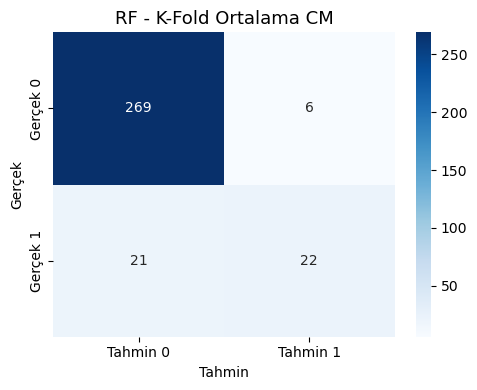


GB - K-Fold Ortalama Confusion Matrix
---------------------------------------
          Tahmin 0  Tahmin 1
Gerçek 0       265        10
Gerçek 1        20        22


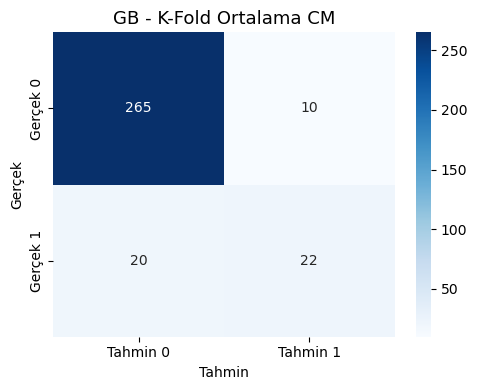

In [27]:
# =========================================================
#              K-FOLD CONFUSION MATRIX + HEATMAP
#                 (Tüm Modeller İçin Tek Kod)
# =========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

# ---------------------------------------------------------
#  Universal Safe Indexing (DataFrame / NumPy otomatik)
# ---------------------------------------------------------
def select_rows(data, idx):
    if isinstance(data, (pd.DataFrame, pd.Series)):
        return data.iloc[idx]
    return data[idx]

# ---------------------------------------------------------
#        K-Fold Ortalama Confusion Matrix Hesabı
# ---------------------------------------------------------
def kfold_confusion(model, X, y, k=5):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    cms = []

    for train_idx, test_idx in skf.split(X, y):
        X_train = select_rows(X, train_idx)
        X_test  = select_rows(X, test_idx)
        y_train = select_rows(y, train_idx)
        y_test  = select_rows(y, test_idx)

        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        cms.append(confusion_matrix(y_test, preds))

    return np.mean(cms, axis=0).astype(int)

# ---------------------------------------------------------
#              Confusion Matrix Heatmap Çizimi
# ---------------------------------------------------------
def plot_cm(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm,
        annot=True,
        cmap="Blues",
        fmt="d",
        xticklabels=["Tahmin 0", "Tahmin 1"],
        yticklabels=["Gerçek 0", "Gerçek 1"]
    )
    plt.title(f"{title} - K-Fold Ortalama CM", fontsize=13)
    plt.xlabel("Tahmin")
    plt.ylabel("Gerçek")
    plt.tight_layout()
    plt.show()

# =========================================================
#                        MODELLER
# =========================================================
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    "LR" : LogisticRegression(max_iter=500),
    "DT" : DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(kernel="rbf", probability=True),
    "ANN": MLPClassifier(max_iter=300),
    "RF" : RandomForestClassifier(),
    "GB" : GradientBoostingClassifier()
}

# =========================================================
#                TÜM MODELLERİN ÇALIŞTIRILMASI
# =========================================================
print("\n==================== K-FOLD CONFUSION MATRICES ====================")

for name, model in models.items():
    cm = kfold_confusion(model, X, y, k=5)

    print(f"\n{name} - K-Fold Ortalama Confusion Matrix")
    print("---------------------------------------")
    print(pd.DataFrame(
        cm,
        index=["Gerçek 0", "Gerçek 1"],
        columns=["Tahmin 0", "Tahmin 1"]
    ))

    # Heatmap çizdir
    plot_cm(cm, name)


In [28]:
# =========================================================
#         K-FOLD BAŞARI METRİKLERİ (TEK TABLO)
# =========================================================

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def kfold_metrics(model, X, y, k=5):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    accuracies = []
    precisions = []
    recalls = []
    specificities = []
    f1s = []

    for train_idx, test_idx in skf.split(X, y):
        X_train = select_rows(X, train_idx)
        X_test  = select_rows(X, test_idx)
        y_train = select_rows(y, train_idx)
        y_test  = select_rows(y, test_idx)

        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        # Metrikler
        accuracies.append(accuracy_score(y_test, preds))
        precisions.append(precision_score(y_test, preds, zero_division=0))
        recalls.append(recall_score(y_test, preds, zero_division=0))
        f1s.append(f1_score(y_test, preds, zero_division=0))

        # Specificity
        cm = confusion_matrix(y_test, preds)
        tn, fp, fn, tp = cm.ravel()
        specificities.append(tn / (tn + fp))

    return [
        np.mean(accuracies),
        np.mean(precisions),
        np.mean(recalls),
        np.mean(specificities),
        np.mean(f1s),
    ]


# ---------------------------------------------------------
# Tek tabloya dökelim
# ---------------------------------------------------------

metric_table = []

for name, model in models.items():
    metric_table.append([name] + kfold_metrics(model, X, y))

df_metrics = pd.DataFrame(metric_table, columns=[
    "Model", "Accuracy", "Precision", "Recall", "Specificity", "F1 Score"
])

print("\n==================== K-FOLD METRIK TABLOSU ====================")
print(df_metrics)



==================== K-FOLD METRIK TABLOSU ====================
  Model  Accuracy  Precision    Recall  Specificity  F1 Score
0    LR  0.881183   0.632656  0.290698     0.973958  0.396618
1    DT  0.870558   0.532219  0.585518     0.915327  0.552828
2   KNN  0.860543   0.476579  0.272199     0.952974  0.345624
3   SVM  0.865543   0.400000  0.009197     1.000000  0.017980
4   ANN  0.874928   0.597044  0.331924     0.960205  0.420210
5    RF  0.913074   0.759740  0.530233     0.973228  0.623641
6    GB  0.903074   0.686366  0.525793     0.962369  0.594794


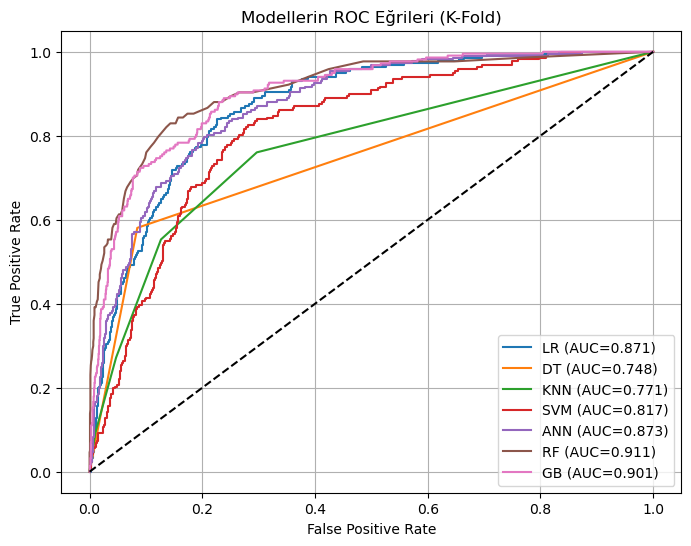

In [29]:
# =========================================================
#                   K-FOLD ROC EĞRİLERİ
# =========================================================

from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for name, model in models.items():
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    y_true_all = []
    y_prob_all = []

    for train_idx, test_idx in skf.split(X, y):
        X_train = select_rows(X, train_idx)
        X_test  = select_rows(X, test_idx)
        y_train = select_rows(y, train_idx)
        y_test  = select_rows(y, test_idx)

        model.fit(X_train, y_train)

        # Probability tahmini
        try:
            probs = model.predict_proba(X_test)[:, 1]
        except:
            probs = model.decision_function(X_test)

        y_true_all.extend(y_test)
        y_prob_all.extend(probs)

    fpr, tpr, _ = roc_curve(y_true_all, y_prob_all)
    auc_value = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_value:.3f})")

plt.plot([0, 1], [0, 1], "k--")
plt.title("Modellerin ROC Eğrileri (K-Fold)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


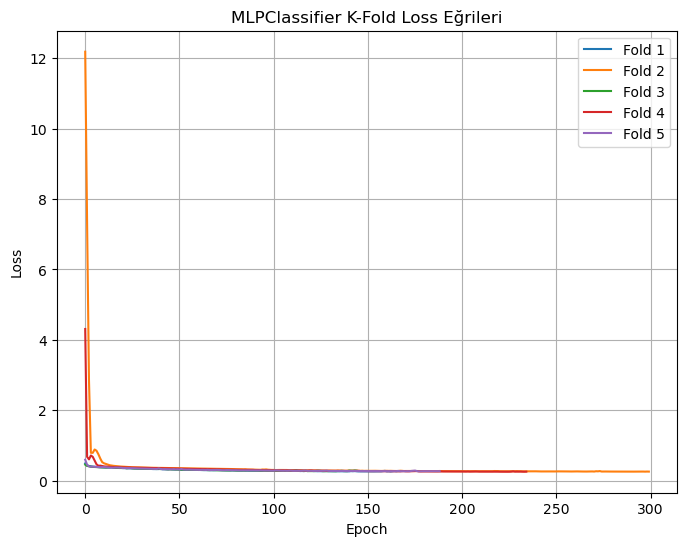

In [30]:
# =========================================================
#            ANN (MLP) K-FOLD LOSS – ACCURACY GRAFİĞİ
# =========================================================

mlp = MLPClassifier(max_iter=300)

plt.figure(figsize=(8, 6))

fold = 1
for train_idx, test_idx in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X, y):
    X_train = select_rows(X, train_idx)
    y_train = select_rows(y, train_idx)

    mlp.fit(X_train, y_train)
    loss_curve = mlp.loss_curve_

    plt.plot(loss_curve, label=f"Fold {fold}")
    fold += 1

plt.title("MLPClassifier K-Fold Loss Eğrileri")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


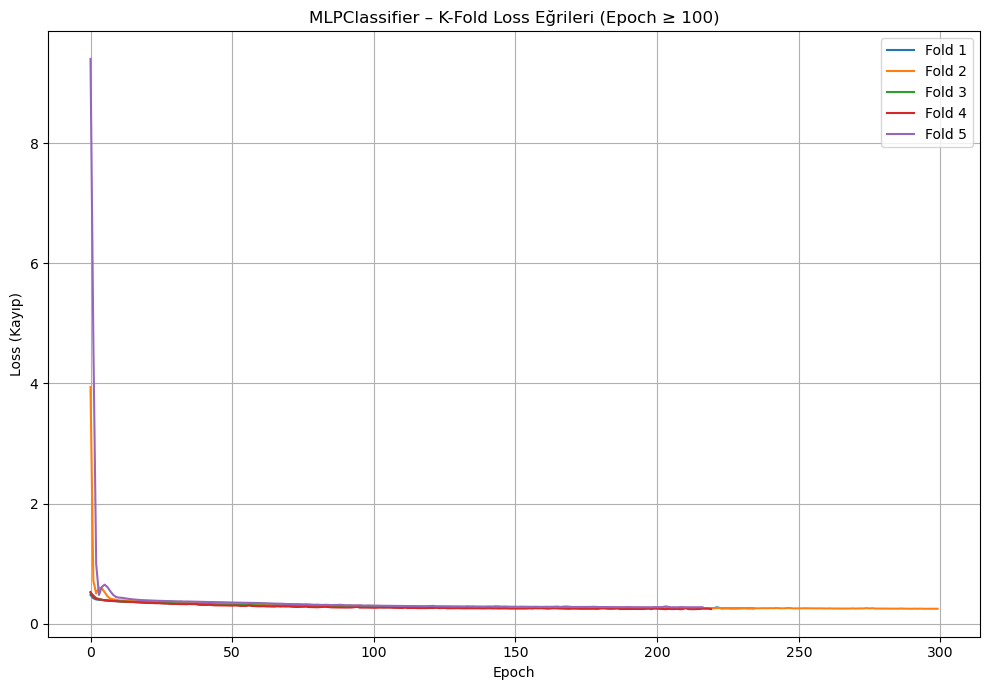

In [34]:
# =========================================================
#          K-FOLD MLPClassifier (ANN) LOSS GRAFİKLERİ
# =========================================================

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold

plt.figure(figsize=(10, 7))

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold = 1

for train_idx, test_idx in skf.split(X, y):

    # Fold verileri
    X_train = select_rows(X, train_idx)
    y_train = select_rows(y, train_idx)

    # ANN model – epoch >= 100 
    mlp_kfold = MLPClassifier(
        hidden_layer_sizes=(100,),
        max_iter=300,
        learning_rate_init=0.001,
        random_state=fold
    )

    # Eğit
    mlp_kfold.fit(X_train, y_train)

    # Loss eğrisi
    loss_curve = mlp_kfold.loss_curve_

    # Grafiğe ekle
    plt.plot(loss_curve, label=f"Fold {fold}")
    fold += 1

# Grafik ayarları
plt.title("MLPClassifier – K-Fold Loss Eğrileri (Epoch ≥ 100)")
plt.xlabel("Epoch")
plt.ylabel("Loss (Kayıp)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
